### 분류 신경망

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [3]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [4]:
print(X.shape)
#13개의 피쳐가 있음.

(178, 13)


In [5]:
print(set(y))
#target data는 3종류

{0, 1, 2}


In [6]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [7]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot,
                                        random_state=0)

In [8]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


In [10]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Train on 133 samples
Epoch 1/30
133/133 [==============================] - 0s 3ms/sample - loss: 1.8539 - accuracy: 0.3835
Epoch 2/30
133/133 [==============================] - 0s 68us/sample - loss: 1.5996 - accuracy: 0.3985
Epoch 3/30
133/133 [==============================] - 0s 239us/sample - loss: 1.3056 - accuracy: 0.3534
Epoch 4/30
133/133 [==============================] - 0s 142us/sample - loss: 1.0861 - accuracy: 0.3910
Epoch 5/30
133/133 [==============================] - 0s 113us/sample - loss: 0.9303 - accuracy: 0.4737
Epoch 6/30
133/133 [==============================] - 0s 204us/sample - loss: 0.8378 - accuracy: 0.6241
Epoch 7/30
133/133 [==============================] - 0s 149us/sample - loss: 0.8117 - accuracy: 0.6241
Epoch 8/30
133/133 [==============================] - 0s 121us/sample - loss: 0.7908 - accuracy: 0.6090
Epoch 9/30
133/133 [==============================] - 0s 186us/sample - loss: 0.7725 - accuracy: 0.6165
Epoch 10/30
133/133 [=========================

In [12]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

133/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [15]:
accuracy = hist.history['accuracy']
print(accuracy)

[0.38345864, 0.39849624, 0.35338345, 0.39097744, 0.47368422, 0.62406015, 0.62406015, 0.60902256, 0.6165413, 0.6315789, 0.6315789, 0.71428573, 0.69924814, 0.7669173, 0.7218045, 0.83458644, 0.7819549, 0.8270677, 0.8120301, 0.7669173, 0.7969925, 0.84962404, 0.7894737, 0.8270677, 0.84962404, 0.83458644, 0.87218046, 0.8120301, 0.8270677, 0.86466163]


In [16]:
loss = hist.history['loss']
print(loss)

[1.8539354792214875, 1.5995953979348778, 1.3055668961732907, 1.0861314691995319, 0.9302657210737243, 0.8378271146824485, 0.811660359228464, 0.7907625898382717, 0.7725107586921606, 0.7598636134674674, 0.8249640061443013, 0.7002797709371811, 0.7944263927918628, 0.725481200935249, 0.7024984570374166, 0.5665542991985952, 0.621996892125983, 0.583277684405334, 0.6031928308924338, 0.613077204702492, 0.5810327174744212, 0.5826524980086133, 0.5615882456750798, 0.53387840013755, 0.4502817774401571, 0.48436081599920316, 0.4070402323303366, 0.5508983108334076, 0.5115865716584643, 0.4334486834984973]


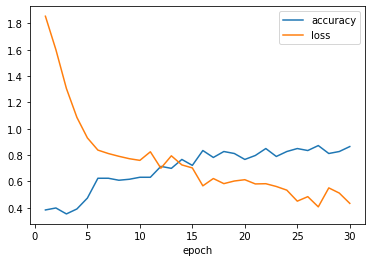

In [17]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label='accuracy')
plt.plot(epoch, loss, label='loss')
plt.xlabel('epoch')

plt.legend()
plt.show()